# Old Town Encode

In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [39]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(600)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

X_train[:5]

array([[-0.96528368, -0.75028092, -0.35189449],
       [-0.10740643,  0.40768461,  0.14731264],
       [-1.04654993, -0.76118039, -0.46076256],
       [-0.75466763, -0.06764017, -0.13909438],
       [-0.71535729,  0.01269158,  0.08260638]])

In [40]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))

In [41]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Train on 600 samples
Epoch 1/20
600/600 [==============================] - 0s 522us/sample - loss: 0.1037
Epoch 2/20
600/600 [==============================] - 0s 58us/sample - loss: 0.0046
Epoch 3/20
600/600 [==============================] - 0s 50us/sample - loss: 0.0036
Epoch 4/20
600/600 [==============================] - 0s 52us/sample - loss: 0.0033
Epoch 5/20
600/600 [==============================] - 0s 43us/sample - loss: 0.0036
Epoch 6/20
600/600 [==============================] - 0s 46us/sample - loss: 0.0032
Epoch 7/20
600/600 [==============================] - 0s 54us/sample - loss: 0.0030
Epoch 8/20
600/600 [==============================] - 0s 56us/sample - loss: 0.0032
Epoch 9/20
600/600 [==============================] - 0s 49us/sample - loss: 0.0033
Epoch 10/20
600/600 [==============================] - 0s 49us/sample - loss: 0.0031
Epoch 11/20
600/600 [==============================] - 0s 50us/sample - loss: 0.0030
Epoch 12/20
600/600 [==============================]

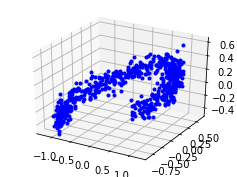

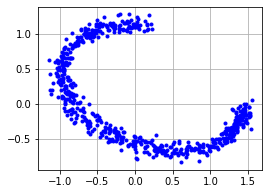

array([[ 1.4268702 , -0.07297166],
       [-0.33811212, -0.4206702 ],
       [ 1.5181158 , -0.12286858],
       [ 0.58079565, -0.5295376 ],
       [ 0.41104844, -0.59205395]], dtype=float32)

In [42]:
codings = encoder.predict(X_train)

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(4,3))
ax = plt.axes(projection='3d')
plt.plot(X_train[:,0], X_train[:, 1], X_train[:, 2], "b.")
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.grid(True)
plt.show()

codings[:5]